In [1]:
from Wavefronts import *
from Storage_Merge import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display

# More Efficient Algorithm

Intiate Algorithm 

In [2]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()

temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Away,Storage_Away)
Storage_Voltage_Completed.append(temp_wavefront)


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                63
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


In [3]:
Process_Wavefronts()

In [4]:
def represent_Reflection_Diagram(ax):
    for wave in Storage_Capacitor_Completed:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')


    for wave in Storage_Inductor_Completed:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=Simulation_Stop_Time):
            ax.plot([x1,x2],[y1,y2],'k-')

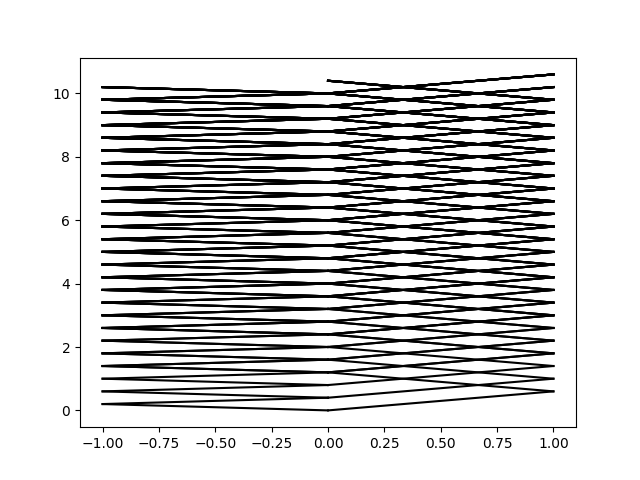

In [5]:
# make it %matplotlib widget
# for widgets

%matplotlib widget
#%matplotlib

fig_reflection, ax_reflection = plt.subplots()

represent_Reflection_Diagram(ax_reflection)

## Position Equirey -> Time Waveform

In [6]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []
combination_count = 0

found_index = True

for wave in Storage_Capacitor_Completed:
    
    time = 0

    time = wave.Time_at_position(0.99)

    try:
        index = Time_Array_Capacitor.index(time)
        combination_count = combination_count  + 1
        found_index = True
    except:
        found_index = False

    if(found_index == False):
        Time_Array_Capacitor.append(time)
        Voltage_Array_Capacitor.append(wave.magnitude_voltage)
        Current_Array_Capacitor.append(wave.magnitude_current)
    else:
        Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
        Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

Voltage_Array_Inductor = []
Current_Array_Inductor = []
Time_Array_Inductor = []

for wave in Storage_Inductor_Completed:
    
    time = 0

    time = wave.Time_at_position(0.99)

    try:
        index = Time_Array_Inductor.index(time)
        found_index = True
    except:
        found_index = False

    if(found_index == False):
        Time_Array_Inductor.append(time)
        Voltage_Array_Inductor.append(wave.magnitude_voltage)
        Current_Array_Inductor.append(wave.magnitude_current)
    else:
        Voltage_Array_Inductor[index] = Voltage_Array_Inductor[index] + wave.magnitude_voltage
        Current_Array_Inductor[index] = Current_Array_Inductor[index] + wave.magnitude_current

In [7]:
Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
Time_Current_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Current_Array_Capacitor))

Time_Voltage_Array_Inductor = sorted(zip(Time_Array_Inductor,Voltage_Array_Inductor))
Time_Current_Array_Inductor = sorted(zip(Time_Array_Capacitor,Current_Array_Inductor))

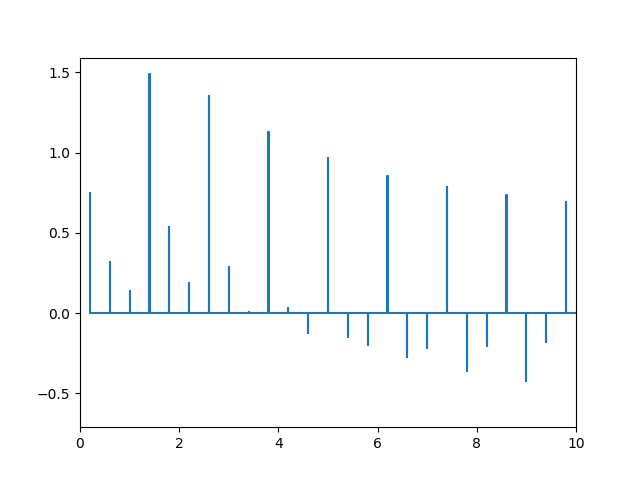

In [8]:
fig_current_capacitor, ax_current_capacitor = plt.subplots()

x,y = zip(*Time_Current_Array_Capacitor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

ax_current_capacitor.set_xlim(0,Simulation_Stop_Time)
ax_current_capacitor.step(x,y,where='post')

Save as CSV for anaylsis

In [9]:
dict = {'time':x, 'Voltage Capacitor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Capacitor_Voltage.csv',index=False)

Plot Inductor Voltage

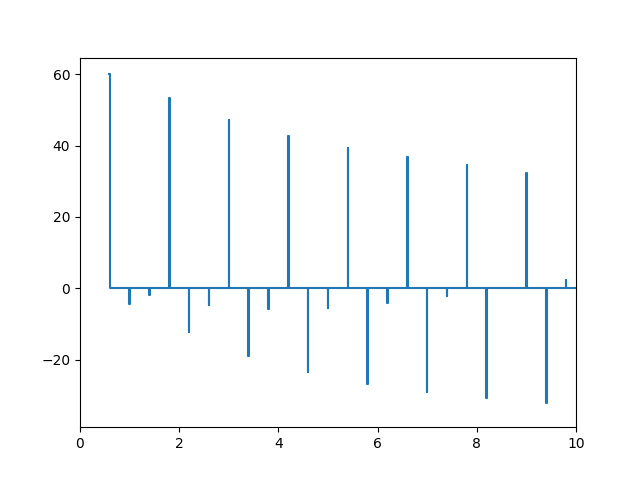

In [10]:
fig_voltage_inductor, ax_voltage_inductor = plt.subplots()

x,y = zip(*Time_Voltage_Array_Inductor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 


ax_voltage_inductor.set_xlim(0,Simulation_Stop_Time)
ax_voltage_inductor.step(x,y,where='post')

Save Inductor Voltage

In [11]:
dict = {'time':x, 'Voltage Inductor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage.csv',index=False)

In [12]:
def intepret_spatial(Wavefront_Array, time):
    Spatial_Current_Capacitor = []
    Position_Array_Capacitor = []

    Current_Forward_Capacitor = []
    Current_Backward_Capacitor = []

    Position_Forward_Capacitor = []
    Position_Backward_Capacitor = []

    found_index = True

    query_time = time
    line_DC = 0

    for wave in Wavefront_Array:

        position = 0

        position = wave.Position_at_time(query_time)

        if position >= 0:

            if wave.position_start == 0:
                try:
                    index = Position_Forward_Capacitor.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Forward_Capacitor[index] += wave.magnitude_current
                else:
                    Position_Forward_Capacitor.append(position)
                    Current_Forward_Capacitor.append(wave.magnitude_current)

                    Position_Array_Capacitor.append(position)

            else:
                try:
                    index = Position_Backward_Capacitor.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Backward_Capacitor[index] += wave.magnitude_current
                else:
                    Position_Backward_Capacitor.append(position)
                    Current_Backward_Capacitor.append(wave.magnitude_current)

                    Position_Array_Capacitor.append(position)


        elif wave.time_end <= query_time:
            line_DC += wave.magnitude_current

    Forward_Zip = list(zip(Position_Forward_Capacitor,Current_Forward_Capacitor))
    Backward_Zip = list(zip(Position_Backward_Capacitor,Current_Backward_Capacitor))

    #Remove doubles
    Position_Array_Capacitor = list(set(Position_Array_Capacitor))
    Position_Array_Capacitor = sorted(Position_Array_Capacitor)

    Position_Array_Capacitor.append(Capacitor_Length)
    Position_Array_Capacitor = [0] + Position_Array_Capacitor

    Spatial_Current_Capacitor = [line_DC]*len(Position_Array_Capacitor)

    # Spatial_Current_Sorted_Capacitor = sorted(zip(Position_Array_Capacitor,Spatial_Current_Capacitor))


    for pos,forward in Forward_Zip:

        index = Position_Array_Capacitor.index(pos)

        for i in range(0,index):
            Spatial_Current_Capacitor[i] += forward

    for pos,backward in Backward_Zip:

        index = Position_Array_Capacitor.index(pos)

        for i in range(index,len(Position_Array_Capacitor)):
            Spatial_Current_Capacitor[i] += backward

    return Position_Array_Capacitor,Spatial_Current_Capacitor

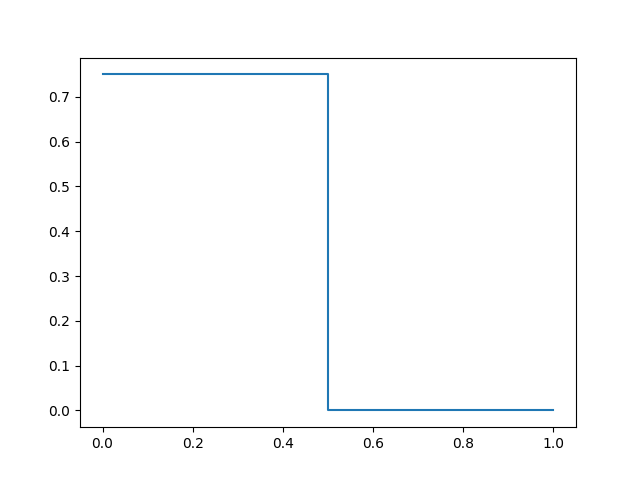

In [13]:
fig_spatial_current_capacitor, ax_spatial_current_capacitor = plt.subplots()

x,y = intepret_spatial(Storage_Capacitor_Completed,0.1)

ax_spatial_current_capacitor.step(x,y,where='post')

## Video Saving

# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 10

fig, ax = plt.subplots()

def animate_pos(t):
    Voltage_Array_Capacitor = []
    Current_Array_Capacitor = []
    Time_Array_Capacitor = []
    time = 0

    t_decimal = Decimal(t)
    duration_decimal = Decimal(duration)

    for wave in Storage_Capacitor_Completed:


        time = wave.Time_at_position((t_decimal/duration_decimal)*Capacitor_Length)

        try:
            index = Time_Array_Capacitor.index(time)
        except:
            index = False

        if(index == False):
            Time_Array_Capacitor.append(time)
            Voltage_Array_Capacitor.append(wave.magnitude_voltage)
            Current_Array_Capacitor.append(wave.magnitude_current)
        else:
            Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
            Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

    #Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
    Time_Current_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Current_Array_Capacitor))

    #x,y = zip(*Time_Voltage_Array_Capacitor)
    x,y = zip(*Time_Current_Array_Capacitor)

    x= list(x)
    y= list(y)

    for i in range(1,len(y)-1):
        y[i] = y[i-1]+y[i]

    ax.clear()
    
    ax.step(x,y,where='post')
    ax.set_xlim(0,Simulation_Stop_Time)
    #ax.set_ylim(-0.25,1.3)

    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(animate_pos, duration = duration)
 
# saving animation
animation.write_videofile("my_animation.mp4", fps=30)


In [14]:
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = 10

fig, ax = plt.subplots()

def animate_time(t):

    x,y = intepret_spatial(Storage_Capacitor_Completed, 8+(t/duration))


    ax.clear()
    
    ax.step(x,y,where='post')
    ax.set_xlim(0,Capacitor_Length)
    ax.set_ylim(-0.14,0.14)

    return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(animate_time, duration = duration)
 
# saving animation
animation.write_videofile("my_animation.mp4", fps=30)

Moviepy - Building video my_animation.mp4.
Moviepy - Writing video my_animation.mp4



Moviepy - Done !
Moviepy - video ready my_animation.mp4


In [15]:
About_Network()


Information about this network : 

- The Voltage Source -
Votage Source Magnitude :               63
Voltage Source Frequency :              50000
Voltage Source Duty cycle :             0.6
Voltage Souce Total Period :            0.00002
Voltage Souce ON Period :               0.000012
Voltage Souce OFF Period :              0.000008

- The Inductor -
Inductor Inductance Per Length :        36
Inductor Capacitance Per Length :       0.01
Inductor Length :                       1
Inductor Total Inductance :             36
Inductor Total Capacitance :            0.01
Inductor Velocity :                     1.666666666666666666666666667
Inductor Time Delay :                   0.5999999999999999999999999999
Inductor Impedance :                    6E+1

- The Capacitor -
Capacitor Inductance Per Length :       0.8
Capacitor Capacitance Per Length :      0.05
Capacitor Length :                      1
Capacitor Total Inductance :            0.8
Capacitor Total Capacitance :           0.05
I